In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [23]:
df=pd.read_csv("training_comments.csv")

df.head()

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups
0,Voerendaalse,&gt; Subsequent validation using a separate va...,"&lt;div class=""md""&gt;&lt;blockquote&gt;\n&lt;...",0,1446262140,1446233340,NaN,0,1446234176.0,0,cwipf39,NaN,t3_3qvj7a,t1_cwipf39,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",1685,science,1685
1,Bloomsey,Peer-reviewed article: http://www.cell.com/can...,"&lt;div class=""md""&gt;&lt;p&gt;Peer-reviewed a...",0,1446260748,1446231948,NaN,0,False,0,cwiohv5,False,t3_3qvj7a,t1_cwiohv5,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",660,science,660
2,schnupfndrache7,is this as revolutionary as it sounds?,"&lt;div class=""md""&gt;&lt;p&gt;is this as revo...",0,1446264074,1446235274,NaN,0,False,0,cwiqorg,NaN,t3_3qvj7a,t1_cwiqorg,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",275,science,275
3,geoffp82,And then what? Full body MRI?,"&lt;div class=""md""&gt;&lt;p&gt;And then what? ...",0,1446262287,1446233487,NaN,0,False,0,cwipio1,NaN,t3_3qvj7a,t1_cwipio1,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",64,science,64
4,momoneymoproblemss,Is it weird I would like to take this test on ...,"&lt;div class=""md""&gt;&lt;p&gt;Is it weird I w...",0,1446263469,1446234669,NaN,0,False,0,cwiqags,NaN,t3_3qvj7a,t1_cwiqags,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",131,science,131


In [24]:
df.shape

(109982, 20)

In [25]:
del df['distinguished']
del df['likes']
del df['num_reports']

In [26]:
corpus = df['body']

In [27]:
file = open("corpus.txt", "w")
for i in corpus:
    file.write(str(i) + '\n')
file.close()
    

# Exploratory Data Analysis Examples 


#Frequently Used words

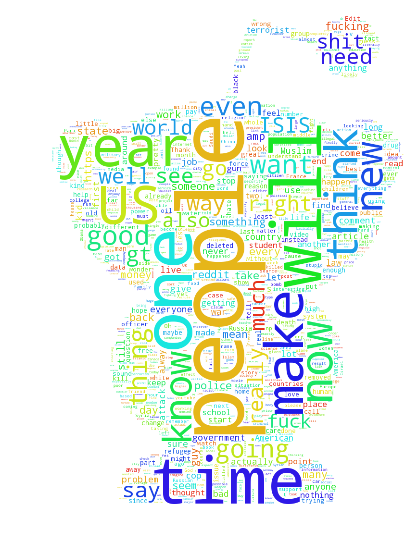

In [43]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

d = path.dirname('__file__')

text = open(path.join(d, 'corpus.txt')).read()
reddit_mask = np.array(Image.open(path.join(d, "reddit-alien.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=reddit_mask)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "reddit.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

# Exploring potential factors that can impact upvotes other than "content" 


Here we filter to only look at "quality" comments that have recieved at least 50 upvotes

In [37]:
filtered = df.drop(df[df.ups < 50].index)

In [39]:
filtered.shape

(7816, 17)

In [44]:
file = open("filter_corpus.txt", "w")
for i in filtered.body:
    file.write(str(i) + '\n')
file.close()

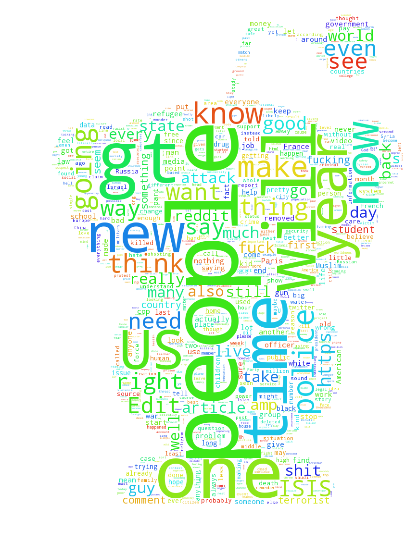

In [45]:
text = open(path.join(d, 'filter_corpus.txt')).read()
reddit_mask = np.array(Image.open(path.join(d, "reddit-alien.png")))
wc = WordCloud(background_color="white", max_words=2000, mask=reddit_mask)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "reddit2.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

The original format is in unix time. This makes comparision between different hours more difficult, so here we will be converting it

In [60]:
for i in filtered.created_utc:
    print i

1446233340.0
1446231948.0
1446235274.0
1446233487.0
1446234669.0
1446242139.0
1446241382.0
1446585152.0
1446589447.0
1446583081.0
1446584073.0
1446596066.0
1446592423.0
1446582176.0
1446584507.0
1446593272.0
1446584563.0
1447250764.0
1447248609.0
1447247356.0
1447246811.0
1445609265.0
1445609405.0
1445600958.0
1445610154.0
1445607714.0
1445607257.0
1447709262.0
1447721703.0
1447721815.0
1447720588.0
1447725736.0
1447722661.0
1447709093.0
1447121287.0
1447124030.0
1447113960.0
1447108380.0
1447118295.0
1447108759.0
1447121532.0
1446147877.0
1446156963.0
1446151000.0
1446159572.0
1446166195.0
1446156585.0
1446151419.0
1446162843.0
1446161338.0
1446316095.0
1446330483.0
1446335264.0
1446326678.0
1446317690.0
1446420128.0
1446423357.0
1446412168.0
1446405597.0
1446420936.0
1446416706.0
1446419516.0
1447874678.0
1447880921.0
1447889661.0
1447873648.0
1447883850.0
1446034369.0
1446034308.0
1446036527.0
1446065659.0
1446035321.0
1446061718.0
1446499993.0
1446501525.0
1446530111.0
1446519807.0

In [62]:
value = datetime.datetime.fromtimestamp(1446593272.0)
value

datetime.datetime(2015, 11, 3, 18, 27, 52)

In [99]:
import datetime
hourlist = []
daylist = []
for i in filtered.created_utc:
    try:
        value = datetime.datetime.fromtimestamp(i).strftime('%H')
        value2 = datetime.datetime.fromtimestamp(i).strftime('%a')
    except:
        pass
    hourlist.append(value)
    daylist.append(value2)

In [84]:
scorelist = []

for i in filtered.ups:
    if np.isnan(i) == True:
        pass
    else:
        scorelist.append(i)

create a tuple here for hour and score

In [90]:
score_tup = zip(hourlist,scorelist)

In [100]:
from collections import Counter
x = Counter(hourlist).most_common()
y = Counter(daylist).most_common()

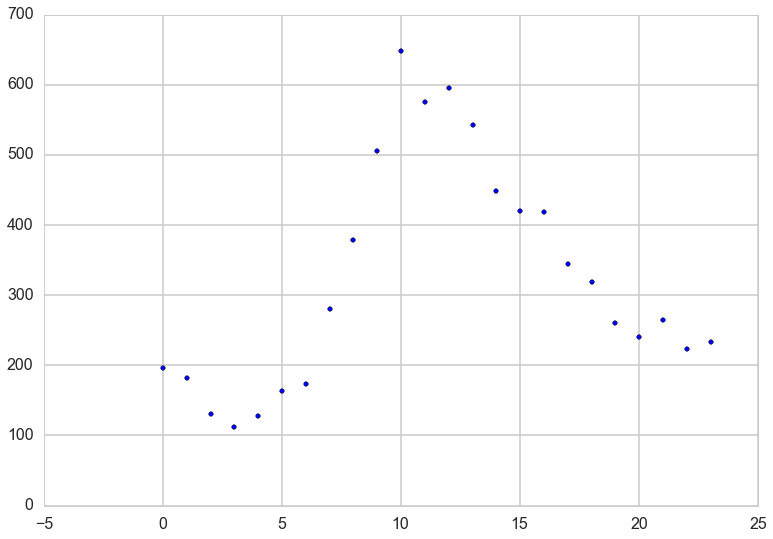

In [98]:
hour = []
freq = []
for h,f in x:
    hour.append(h)
    freq.append(f)
plt.scatter(hour,freq)

In [103]:
day = []
fre = []
for d,f in y:
    day.append(d)
    fre.append(f)
    
plt.hist(fre,)